In [1]:
import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

#What were the top Australian news topics over the last decade, and what can these say about the national conversation?

## Interpretion of this question：
**News topics** would be the subject of news ,for example, politics, technology,economy... etc.  
**The top Australian news topics** would be the news topics which oucurred the most over the last decade.  
**National conversation** would be the hot topics what people are talking about. Here the threads in Reddit would be chosen to represent national conversation.  
**"What can these say about"** means the relationship between the top Australian news topics and national conversation and how they affect each other.  
## Key stakeholders who have an interest in the question:
- **Government**: 

  Government can have a better understanding about the major concerns of citizens so that it can implement policies corresponding to those concerns.

- **Media industry**:

  By knowing what were the hot topics, media industry can produce more eye-catching contents about the hot topics and make more profits.
  
- **Research institutes of social science**:

  It is an important material for social science research.
  


In [27]:


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB 


### Collect / Load Data

For this case study, I will make use of the following data:

- [A Million News Headlines](https://www.kaggle.com/therohk/million-headlines)
- [Worldnews on Reddit from 2008 to Today](https://www.kaggle.com/rootuser/worldnews-on-reddit)


In [28]:

abc = pd.read_csv("abcnews-date-text.csv",parse_dates=[0], infer_datetime_format=True)
abc = abc[(abc['publish_date'] >= '2009-01-01')] #filterring the years not belong to last decade(2009-1019)
abc


,publish_date,headline_text
433861,2009-01-01,2008 deadliest year for us forces in afghanistan
433862,2009-01-01,2008 dubbed wet year for hunter
433863,2009-01-01,2 israelis injured in danish mall shooting
433864,2009-01-01,8500 qld homes without power after storms
433865,2009-01-01,about 60 killed in bankgok fire
...,...,...
1186013,2019-12-31,vision of flames approaching corryong in victoria
1186014,2019-12-31,wa police and government backflip on drug amne...
1186015,2019-12-31,we have fears for their safety: victorian premier
1186016,2019-12-31,when do the 20s start


In [29]:

reddit = pd.read_csv("reddit_worldnews_start_to_2016-11-22.csv")
reddit= reddit.loc[:,["date_created","title"]]
reddit = reddit[(reddit['date_created'] >= '2009-01-01')] #filterring the years not belong to last decade(2009-1019)
reddit

,date_created,title
22505,2009-01-01,Vanity Fair: An Oral History of the Bush White...
22506,2009-01-01,New Norway law bans buying of sex
22507,2009-01-01,Graphic pictures of what the Israeli war machi...
22508,2009-01-01,UK telecom firm severs ties with Israeli compa...
22509,2009-01-01,"Israel Rejects Cease-Fire, but Offers Gaza Aid"
...,...,...
509231,2016-11-22,Heil Trump : Donald Trump s alt-right white...
509232,2016-11-22,There are people speculating that this could b...
509233,2016-11-22,Professor receives Arab Researchers Award
509234,2016-11-22,Nigel Farage attacks response to Trump ambassa...


## Analysis

### Top Australian news topics

In [30]:
data = fetch_20newsgroups()  #trainning a text classifier
categories = data.target_names
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)

def predict_category(s, train=train, model=model):  #a function to classify the text
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [31]:
##because the following code need a long time to run so I saved the result to the csv
#predictions = []
#for i in abc["headline_text"]:
 #  predictions.append(predict_category(i))
#abc["predictions"]= predictions
#abc.to_csv("abc_prediction.csv")

abc_prediction= pd.read_csv("abc_prediction.csv")
abc_prediction

,Unnamed: 0,publish_date,headline_text,predictions
0,433861,2009-01-01,2008 deadliest year for us forces in afghanistan,talk.politics.mideast
1,433862,2009-01-01,2008 dubbed wet year for hunter,rec.sport.baseball
2,433863,2009-01-01,2 israelis injured in danish mall shooting,talk.politics.mideast
3,433864,2009-01-01,8500 qld homes without power after storms,talk.politics.mideast
4,433865,2009-01-01,about 60 killed in bankgok fire,talk.politics.guns
...,...,...,...,...
752152,1186013,2019-12-31,vision of flames approaching corryong in victoria,rec.sport.hockey
752153,1186014,2019-12-31,wa police and government backflip on drug amne...,sci.crypt
752154,1186015,2019-12-31,we have fears for their safety: victorian premier,talk.politics.guns
752155,1186016,2019-12-31,when do the 20s start,rec.sport.baseball


### Top news topics in national conversation

In [32]:
abc_prediction['publish_date'] =  pd.to_datetime(abc_prediction['publish_date'])
abc_prediction_count = abc_prediction.groupby(["predictions"])['predictions'].count().reset_index(name='count')
abc_prediction_count = abc_prediction_count.sort_values('count', ascending=True)
abc_prediction_count

,predictions,count
19,talk.religion.misc,153
0,alt.atheism,3834
4,comp.sys.mac.hardware,6719
1,comp.graphics,7336
5,comp.windows.x,9644
2,comp.os.ms-windows.misc,10183
3,comp.sys.ibm.pc.hardware,11722
6,misc.forsale,14433
12,sci.electronics,14679
18,talk.politics.misc,25098


In [33]:
##because the following code need a long time to run so I saved the result to the csv
#predictions = []
#for i in reddit["title"]:
  #  predictions.append(predict_category(i))
#reddit["predictions"]= predictions
#reddit.to_csv("reddit_predrction.csv")
reddit_predrction = pd.read_csv("reddit_predrction.csv")

In [34]:
reddit_predrction

,Unnamed: 0,date_created,title,predictions
0,22505,2009-01-01,Vanity Fair: An Oral History of the Bush White...,sci.crypt
1,22506,2009-01-01,New Norway law bans buying of sex,talk.politics.guns
2,22507,2009-01-01,Graphic pictures of what the Israeli war machi...,talk.politics.mideast
3,22508,2009-01-01,UK telecom firm severs ties with Israeli compa...,talk.politics.mideast
4,22509,2009-01-01,"Israel Rejects Cease-Fire, but Offers Gaza Aid",talk.politics.mideast
...,...,...,...,...
486726,509231,2016-11-22,Heil Trump : Donald Trump s alt-right white...,talk.politics.guns
486727,509232,2016-11-22,There are people speculating that this could b...,soc.religion.christian
486728,509233,2016-11-22,Professor receives Arab Researchers Award,talk.politics.mideast
486729,509234,2016-11-22,Nigel Farage attacks response to Trump ambassa...,talk.politics.mideast


In [35]:
reddit_predrction['date_created'] =  pd.to_datetime(reddit_predrction['date_created'])
reddit_predrction_count = reddit_predrction.groupby(["predictions"])['predictions'].count().reset_index(name='count')
reddit_predrction_count = reddit_predrction_count.sort_values(['count'], ascending=True)
reddit_predrction_count

,predictions,count
19,talk.religion.misc,9
2,comp.os.ms-windows.misc,1424
4,comp.sys.mac.hardware,1428
1,comp.graphics,1556
5,comp.windows.x,1996
0,alt.atheism,2197
3,comp.sys.ibm.pc.hardware,2348
6,misc.forsale,2853
12,sci.electronics,4046
8,rec.motorcycles,7389


In [36]:
abc_prediction_to2016=abc_prediction[(abc_prediction['publish_date'] <= '2016-11-22')] #to make the comparison because of the reddit dataset is from 2008 to 2016
abc_trend=abc_prediction_to2016.groupby([abc_prediction_to2016['publish_date'].dt.year,"predictions"])["predictions"].count().reset_index(name='count')
abc_trend_pivot = abc_trend.pivot(index='publish_date', columns='predictions', values='count')
abc_trend_pivot

predictions,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
publish_date,,,,,,,,,,,,,,,,,,,,
2009,395,681,1016,1214,620,973,1478,5366,4154,5704,6882,7383,1455,5096,5936,7793,8624,8712,2954,8
2010,356,660,999,1091,612,1026,1470,5184,4319,6262,7213,7014,1355,5051,5794,7644,8291,7999,2583,8
2011,353,784,1058,1313,727,1143,1685,5306,4109,6009,8210,7207,1623,4909,6301,7448,8119,8848,2612,14
2012,430,829,1251,1535,865,1366,1877,5818,4373,6611,9667,8950,1875,5757,7666,8330,9205,9767,2825,11
2013,421,940,1297,1481,870,1343,1861,6179,4665,6485,9448,8966,1896,6176,7617,8723,10123,10309,3108,20
2014,477,870,1044,1398,795,1049,1730,5042,3775,5800,8754,7633,1690,5877,7076,7896,8269,9836,2510,10
2015,459,735,1201,1211,689,866,1359,4709,3406,5023,8290,7177,1469,5245,6577,8040,8133,10341,2339,21
2016,289,568,781,817,461,612,986,3340,2567,3639,5222,5454,1033,3966,4821,6362,6242,7005,2045,24


In [37]:
reddit_predrction
reddit_trend=reddit_predrction.groupby([reddit_predrction['date_created'].dt.year,"predictions"])["predictions"].count().reset_index(name='count')
reddit_trend_pivot = reddit_trend.pivot(index='date_created', columns='predictions', values='count')
reddit_trend_pivot

predictions,alt.atheism,comp.graphics,comp.os.ms-windows.misc,comp.sys.ibm.pc.hardware,comp.sys.mac.hardware,comp.windows.x,misc.forsale,rec.autos,rec.motorcycles,rec.sport.baseball,rec.sport.hockey,sci.crypt,sci.electronics,sci.med,sci.space,soc.religion.christian,talk.politics.guns,talk.politics.mideast,talk.politics.misc,talk.religion.misc
date_created,,,,,,,,,,,,,,,,,,,,
2009,117.0,125.0,132.0,154.0,101.0,126.0,194.0,790.0,493.0,646.0,1009.0,2156.0,236.0,939.0,1339.0,3235.0,2412.0,10228.0,682.0,1.0
2010,99.0,90.0,71.0,116.0,71.0,85.0,106.0,698.0,379.0,513.0,903.0,1988.0,153.0,761.0,1240.0,3052.0,2291.0,10039.0,656.0,2.0
2011,125.0,160.0,89.0,180.0,125.0,179.0,184.0,1010.0,516.0,790.0,1188.0,3130.0,529.0,1301.0,2782.0,3910.0,4077.0,17688.0,923.0,NaN
2012,193.0,122.0,125.0,187.0,114.0,133.0,189.0,1195.0,690.0,887.0,1641.0,3448.0,297.0,1657.0,2692.0,4348.0,4533.0,18752.0,1440.0,NaN
2013,398.0,324.0,237.0,423.0,246.0,361.0,542.0,2764.0,1412.0,1897.0,3428.0,8259.0,726.0,3574.0,5834.0,9602.0,9129.0,36119.0,2952.0,4.0
2014,442.0,261.0,246.0,410.0,241.0,399.0,587.0,2380.0,1255.0,1663.0,3565.0,8158.0,667.0,3378.0,7551.0,7621.0,7946.0,42052.0,3208.0,NaN
2015,467.0,265.0,282.0,460.0,252.0,324.0,577.0,2851.0,1405.0,1900.0,3377.0,8169.0,760.0,3441.0,7512.0,8067.0,7971.0,43975.0,2564.0,2.0
2016,356.0,209.0,242.0,418.0,278.0,389.0,474.0,2636.0,1239.0,1775.0,3091.0,6951.0,678.0,3392.0,7136.0,6979.0,8033.0,35208.0,2408.0,NaN


##  Visualization
### Top Australian news topics

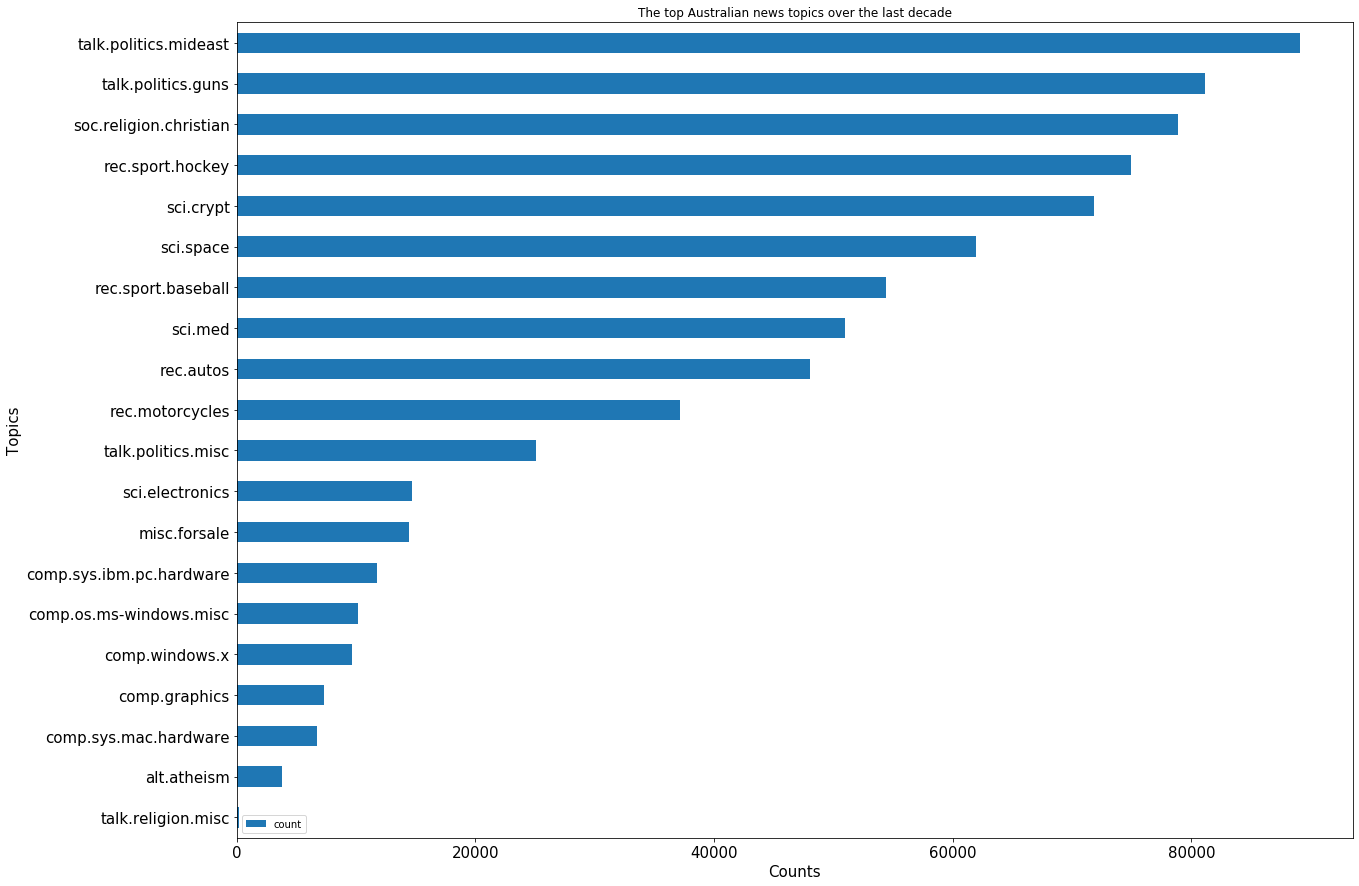

In [38]:
abc_prediction_count.index = abc_prediction_count["predictions"]
ax = abc_prediction_count.plot(kind='barh', title ="The top Australian news topics over the last decade", figsize=(20, 15), legend=True, fontsize=15)
ax.set_xlabel("Counts", fontsize=15)
ax.set_ylabel("Topics", fontsize=15)
plt.show()

### Top news topics in national conversation

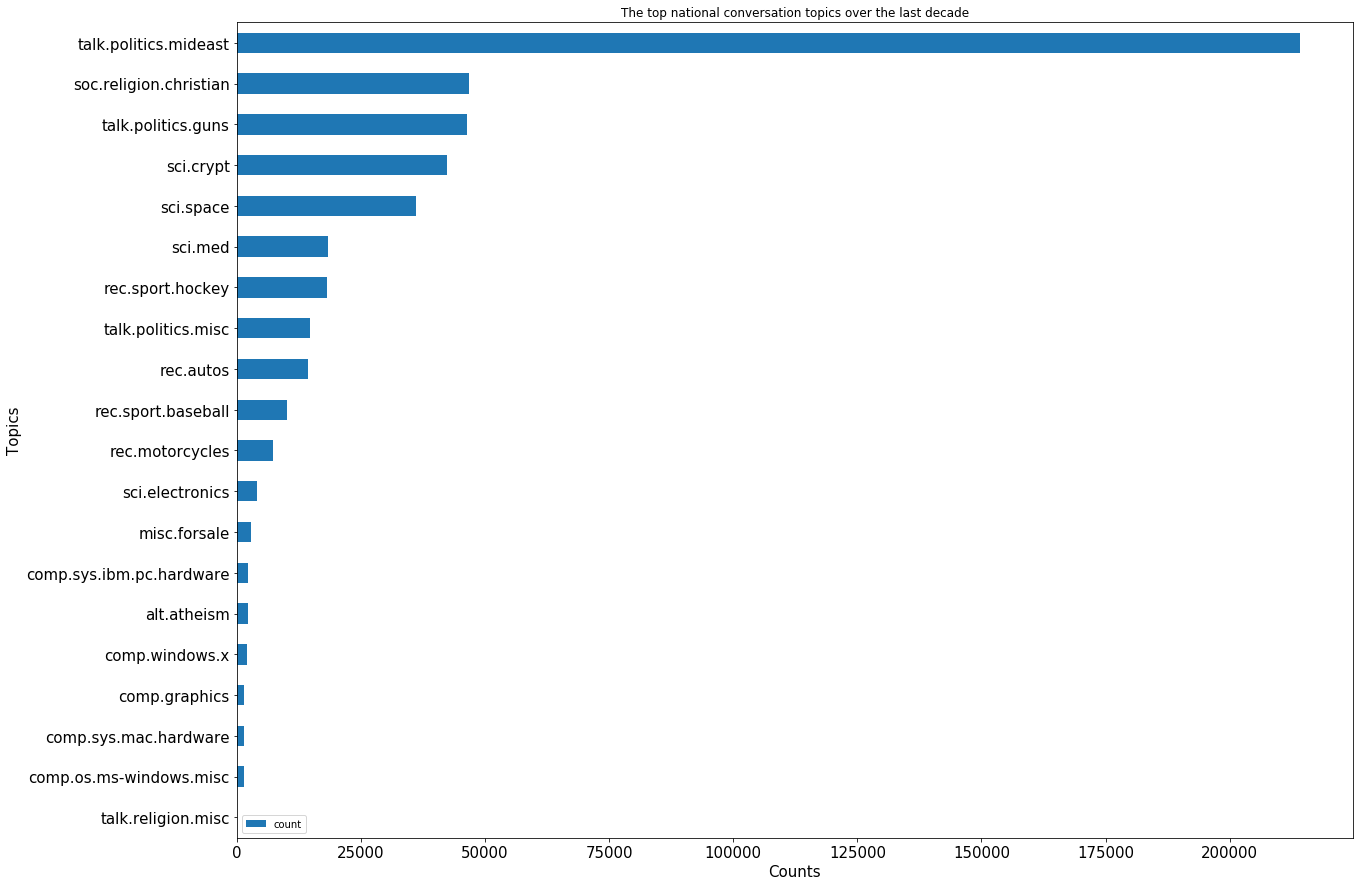

In [39]:
reddit_predrction_count.index = reddit_predrction_count["predictions"]
ax = reddit_predrction_count.plot(kind='barh', title ="The top national conversation topics over the last decade", figsize=(20, 15), legend=True, fontsize=15)
ax.set_xlabel("Counts", fontsize=15)
ax.set_ylabel("Topics", fontsize=15)
plt.show()

### Relationship between trend of top Australia top news topic and trend of top news topics in national conversation
**The top 3 news topics** are chosen to be investigated

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


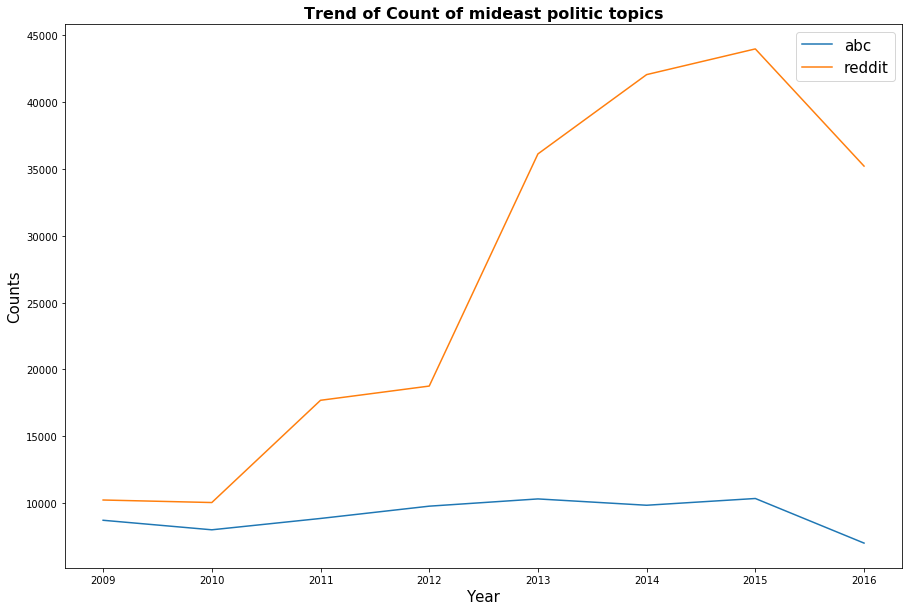

In [40]:
fig = plt.figure(figsize=(15,10))
ax1 =fig.add_subplot(111)
ax1.plot(abc_trend_pivot["talk.politics.mideast"],label = "abc")

ax2 = fig.add_subplot(111)
ax2.plot(reddit_trend_pivot["talk.politics.mideast"],label = "reddit")

plt.legend(fontsize=15)
plt.title("Trend of Count of mideast politic topics", fontsize=16, fontweight='bold')
plt.xlabel("Year",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.show()



/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


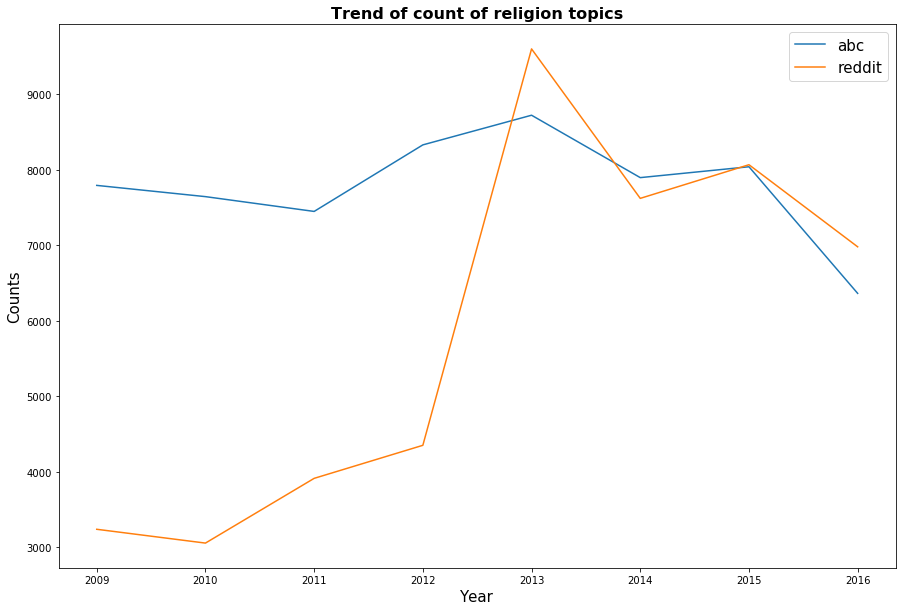

In [41]:
fig = plt.figure(figsize=(15,10))
ax1 =fig.add_subplot(111)
ax1.plot(abc_trend_pivot["soc.religion.christian"],label = "abc")

ax2 = fig.add_subplot(111)
ax2.plot(reddit_trend_pivot["soc.religion.christian"],label = "reddit")

plt.legend(fontsize=15)
plt.title("Trend of count of religion topics", fontsize=16, fontweight='bold')
plt.xlabel("Year",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.show()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


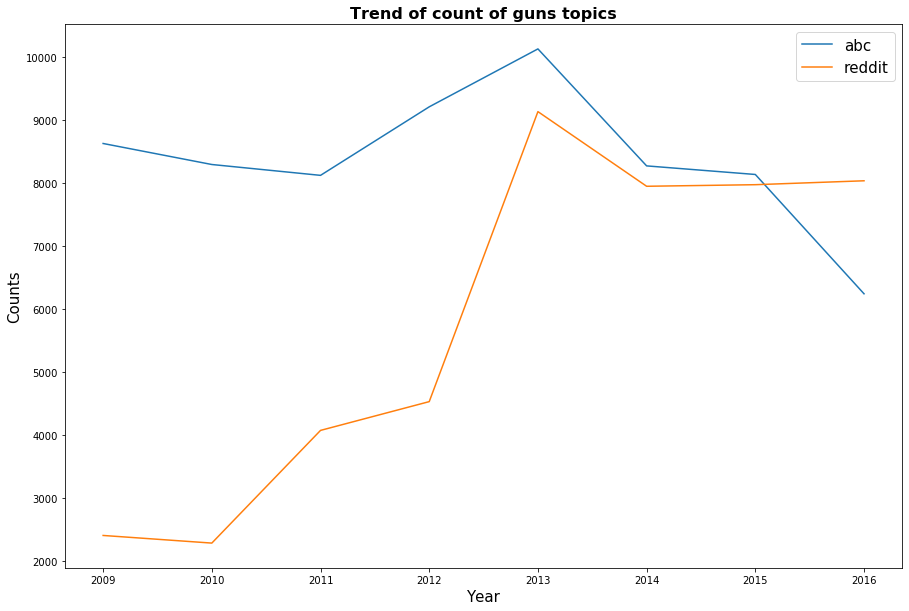

In [42]:
fig = plt.figure(figsize=(15,10))
ax1 =fig.add_subplot(111)
ax1.plot(abc_trend_pivot["talk.politics.guns"],label = "abc")

ax2 = fig.add_subplot(111)
ax2.plot(reddit_trend_pivot["talk.politics.guns"],label = "reddit")

plt.legend(fontsize=15)
plt.title("Trend of count of guns topics", fontsize=16, fontweight='bold')
plt.xlabel("Year",fontsize=15)
plt.ylabel("Counts",fontsize=15)
plt.show()


## Insight

### Top Australian news topics:
The top 3 Australian news topics would be mideaest, guns and religion.
### Top news topics in national conversation:
the top 3 news topics in national conversation is the same as top 3 Australian news topics. Moreover ,their distributions of news topics are very similar. It proved that the news published by media can highly affect what people talk about.
### Relationship between trend of top Australia top news topic and trend of top news topics in national conversation
The trend of top Australia top news topic and trend of top news topics in national conversation are closely related. It again proved that the news published by media can highly affect what people talk about.